In [86]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("C:\\Users\\liamh\\Desktop\\Churn_Modelling.csv")

In [88]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [89]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


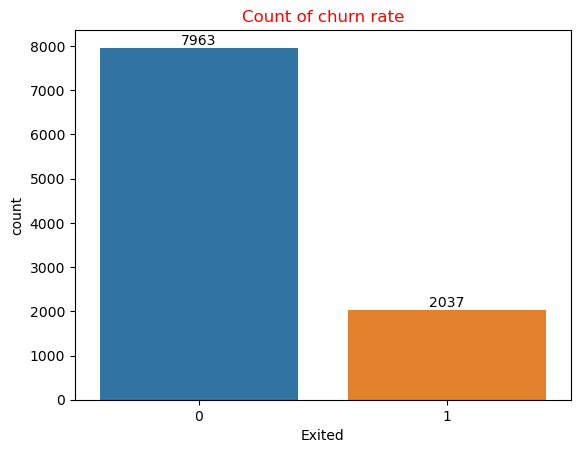

In [90]:
ax = sns.countplot(df.Exited)
plt.bar_label(ax.containers[0])
plt.title("Count of churn rate",color="red");

In [91]:
corr_matrix = df.corr()
print(corr_matrix)

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

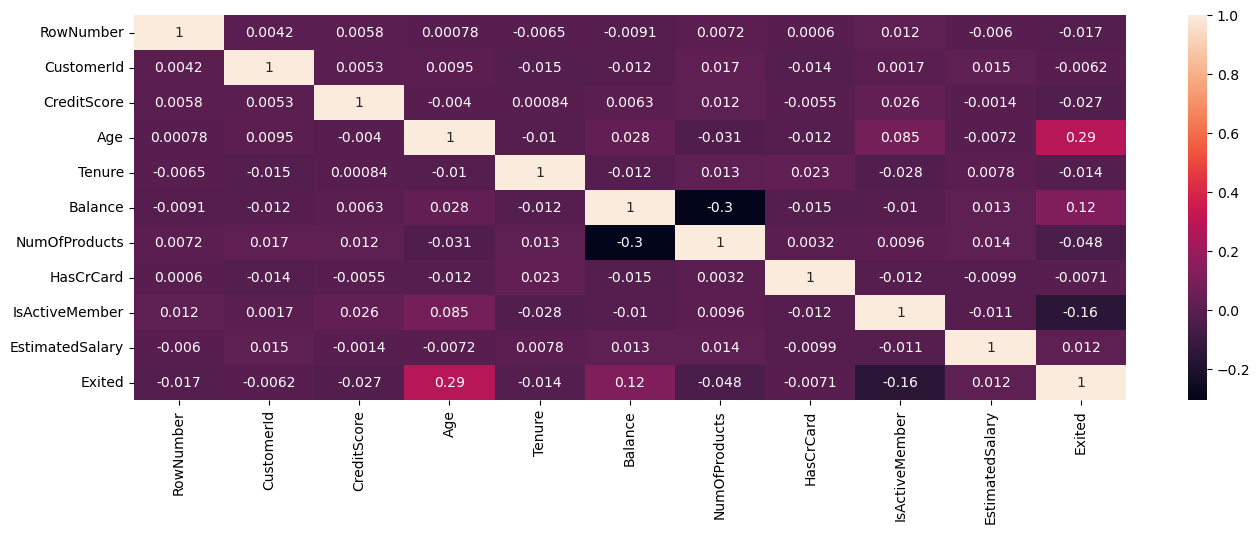

In [92]:
corr_matrix = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [93]:
df = df.drop(columns = ["RowNumber","CustomerId","Surname"])

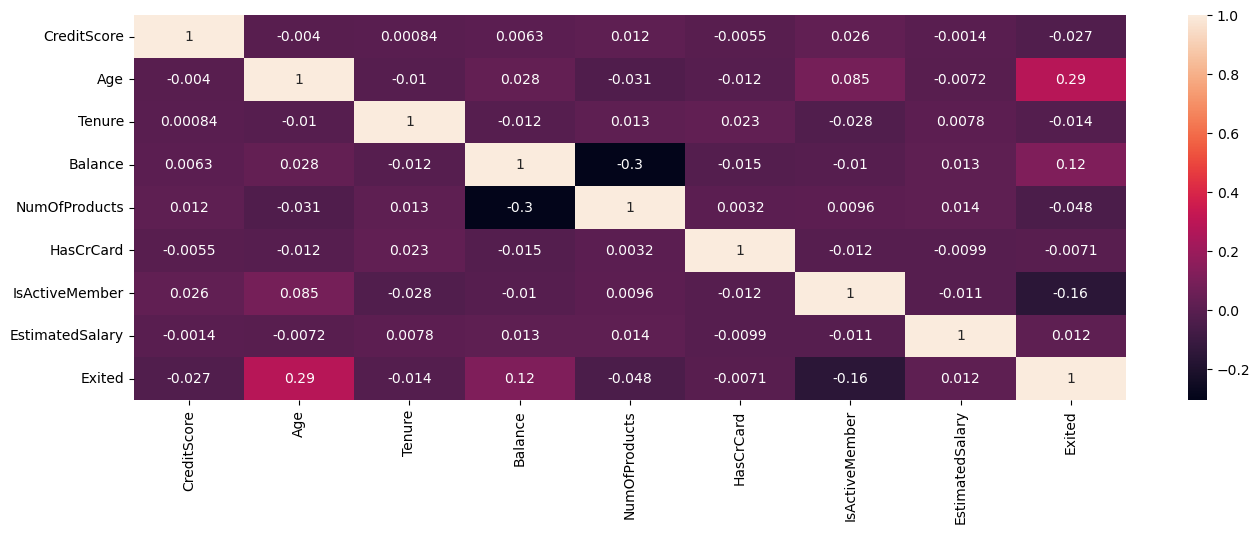

In [94]:
corr_matrix = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [95]:
X = df[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].copy()
y = df["Exited"]

In [96]:
X

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,1,1,1,101348.88
1,608,41,1,1,0,1,112542.58
2,502,42,8,3,1,0,113931.57
3,699,39,1,2,0,0,93826.63
4,850,43,2,1,1,1,79084.10
...,...,...,...,...,...,...,...
9995,771,39,5,2,1,0,96270.64
9996,516,35,10,1,1,1,101699.77
9997,709,36,7,1,0,1,42085.58
9998,772,42,3,2,1,0,92888.52


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [98]:
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_trainSmote, y_trainSmote = sm.fit_resample(X_train, y_train)

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


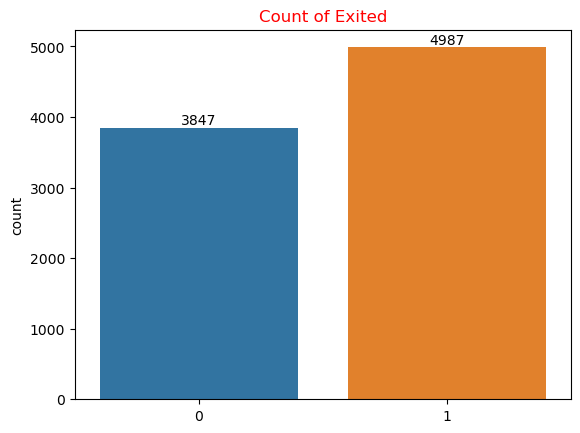

In [100]:
ax = sns.countplot(y_trainSmote)
plt.bar_label(ax.containers[0])
plt.title("Count of Exited",color="red");

In [101]:
def linear(H):
    return H

def ReLU(H):
    return H*(H>0)


def sigmoid(H):
    return 1/(1+np.exp(-H))

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis =1, keepdims=True)
# Loss Functions /  Objective functions / Cost Functions 
# How we define error

def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat)+(1-Y)*np.log(1-P_hat))

def OLS (Y,Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i,y[i]] = 1
        
    
    return Y

# metrics 

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def R2(y,y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)



In [102]:
def derivative(Z, a):
    if a == linear:
        return 1
    elif a ==sigmoid:
        return Z*(1-Z)
    
    elif a == np.tanh:
        return 1-Z*Z 
    
    elif a == ReLU:
        return (Z>0).astype(int)
    
    elif a ==LeakyReLU:
        return np.where(x>0, 1, 0.005) 
    
    else:
        ValueError("Unknown Activation Function")

In [103]:
class ANN():
  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations=activations
    self.L = len(architecture)+1

  def fit(self, X, y, eta= 0.005, epochs =1e3, show_curve=False):
    epochs=int(epochs)
    if self.mode:
      Y=y
    else:
      Y =one_hot_encode(y)

    N,D =X.shape
    K=Y.shape[1]

    #Initialize Weights and Biases:  Stochastic Initialization
    self.W ={l: np.random.randn(M[0],M[1]) for l, M in enumerate
             (zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l,M in enumerate(self.architecture +[K],1)}

    #Activation Function Loading
    if self.activations is None:
      self.a = {l: ReLU for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)} 

    # Mode Output Activation Function Set
    if self.mode:
      self.a[self.L]= linear
    else:
      self.a[self.L] = sigmoid

    J = np.zeros(epochs)

    #Gradient Descent/ Back Prop

    for epoch in range(epochs):
      self.forward(X)
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]= cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse= True):
        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@self.W[l].T 
          dH = dZ*derivative(self.Z[l-1], self.a[l-1]) 
    
    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.show()

  def forward(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+ self.b[l]) 

  def predict ( self, X):
    self.forward(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

In [104]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def recall(y, y_hat, c):
    return np.mean(y_hat[y==c]==c)

def precision(y,y_hat,c):
    return np.mean(y[y_hat==c]==c)

def F1(y,y_hat,c):
    return (2*precision(y,y_hat,c)*recall(y,y_hat,c))/(precision(y,y_hat,c)+recall(y,y_hat,c))

In [ ]:
myANN = ANN(mode = 0, architecture = [20,10,4], activations = [np.tanh,ReLU,ReLU])

myANN.fit(X_trainSmote,y_trainSmote,epochs = 1e5,show_curve = True)

y_hat =myANN.predict(X_trainSmote)

accuracy(y_trainSmote,y_hat)

In [106]:
y_hat =myANN.predict(X_test)

accuracy(y_test,y_hat)

0.6745

In [108]:
print(accuracy(y_test,y_hat))
print(precision(y_test,y_hat,))
print(recall(y_test,y_hat))
print(f1(y_test,y_hat))


0.6745
0.0


C:\Users\liamh\AppData\Local\Temp\ipykernel_8724\3083123985.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(y[y_hat==c]==c)


TypeError: recall() missing 1 required positional argument: 'c'